## Notebook to Explore Boundary conditions for Standing and Travelling Waves ##

What if you have a standing wave but put in the wrong boundary conditions.  Or if you have a travelling wave and do the same thing?

Lets start with a right travelling and a left travelling wave:

$$\eta = A \cos(k x - \omega t) + B \cos(-kx -\omega t + \phi)$$

where $x = 0$ is at bay mouth.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.arange(0.,200.,5.)*1000.         # m
A = 1                                    # m
B = 0.6
phi = -np.pi*0.55
omega = 2*np.pi/(12.4*3600.)            # /s
h = 150.                                 # m
g = 10.                                  # m/s2
c = np.sqrt(g*h)                        # m/s
k = omega/c                             # /m
t = np.arange(-np.pi,np.pi)/omega                                  # s

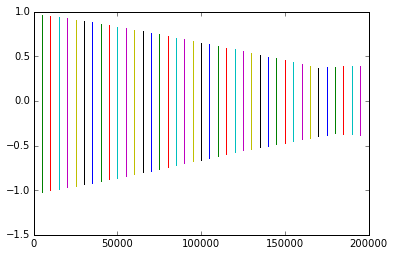

In [4]:
x, t = np.meshgrid(x,t)
eta = A * np.cos(k*x - omega*t) + B * np.cos(-k*x -omega*t +phi)
plt.plot(x,eta);

Now $$\frac{\partial u}{\partial t} = -g \frac{\partial \eta}{\partial x}$$
$$\frac{\partial u}{\partial t} = -g \frac{\partial}{\partial x}\left[A \cos(k x - \omega t) + B \cos(-kx -\omega t + \phi)\right]$$

$$\frac{\partial u}{\partial t} = -g \left[ kA \sin(k x - \omega t) - kB \sin(-kx -\omega t + \phi) \right]$$

$$ u = \frac {g}{c} \left[ A \cos(k x - \omega t) - B \cos(-k x - \omega t + \phi) \right]$$

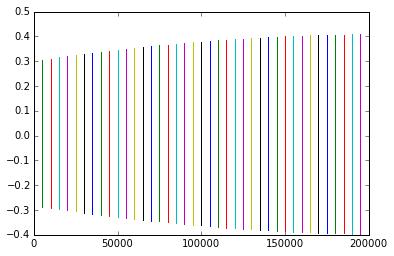

In [5]:
u = g / c * (A * np.cos(k*x - omega*t) - B * np.cos(-k*x -omega*t + phi))
plt.plot (x,u);

So for my current wave, $u$ increases into the "amphidrome" and $\eta$ decreases. At $x=0$, 
$$\eta = A \cos(- \omega t) + B \cos(-\omega t + \phi)$$
and 
$$u = \frac g c \left[ A \cos(-\omega t) - B \cos(-\omega t + \phi) \right]$$
Apply sum and difference formulas:
$$\eta = (A-B) \cos(\omega t) + 2 B \cos(-\omega t + \phi/2) \cos(\phi/2)$$
and $$u = \frac g c \left[ (A-B) \cos(\omega t) + 2 B \sin(-\omega t + \phi/2) \sin(\phi/2)\right]$$
The first part, the part proportional to $(A-B)$ is the travelling component (goes in, doesn't come out). This part has no phase difference between $u$ and $\eta$.
The second part, that part proportional to $2B$ is the standing component.  Looking at it:
$$2B \cos(\omega t - \phi/2) \cos(\phi/2)$$
and
$$-2B \sin(\omega t - \phi/2) \sin(\phi/2)$$

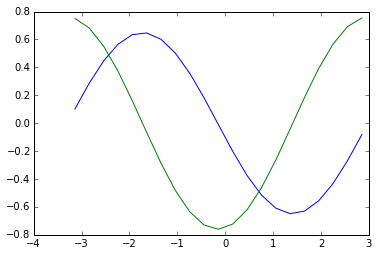

In [6]:
wt = np.arange(-np.pi,np.pi,0.3)
first = np.cos(phi/2)*np.cos(wt-phi)
second = np.sin(phi/2)*np.sin(wt-phi)
plt.plot(wt,first)
plt.plot(wt,second);

So these components are exactly 90 degress out of phase.  The $u$ amplitude is augmented by $\tan(\phi/2)$

In [7]:
print g/c

0.258198889747


The ratio of $g/c$ for 150 m depth water is 0.26/s.  Raw ratio of M2 u/M2 amp and for K1

In [8]:
print (0.271/0.8232), (0.190/0.415)

0.329203109815 0.457831325301


and the phase differences are M2 -54 degrees and K1 60 degrees

So, as a guess for K1, say we have 1/3 travelling and 2/3 standing.  That means B = 1/3 and A = 2/3. That is based on the lag.  


(30, 629, 23) (30, 629, 23) (30,)


<matplotlib.colorbar.Colorbar instance at 0x1095e9ea8>

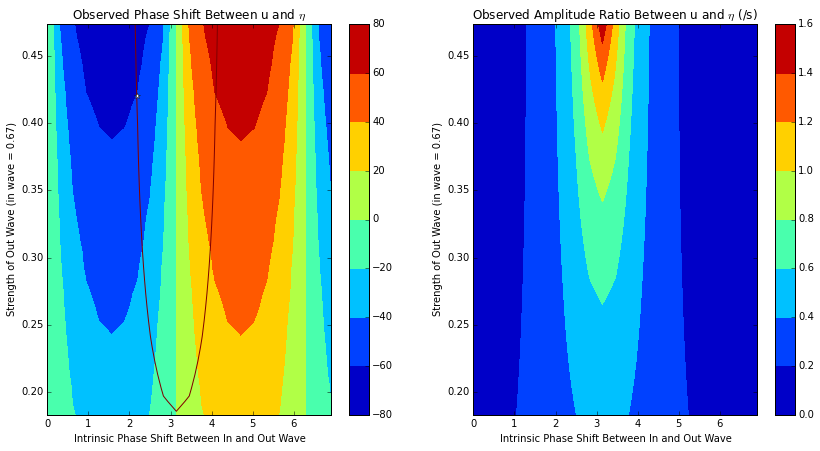

In [21]:
swt = np.arange(-np.pi,np.pi,0.01)
AK = 2/3.
sBK = 1/3.+np.arange(-0.15,0.15,0.01)
sphi = np.arange(0,2.3,0.1)*np.pi
wt, BK, phi = np.meshgrid(swt, sBK, sphi)
eta = (AK-BK)*np.cos(wt) + 2*BK * np.cos(wt-phi/2.) * np.cos(phi/2.)
u = (AK-BK)*np.cos(wt) - 2*BK * np.sin(wt-phi/2.) * np.sin(phi/2.)
#plt.plot(wt,eta)
#plt.plot(wt,u)
phase = np.zeros((u.shape[0],u.shape[2]))
amp = np.zeros_like(phase)
print u.shape, eta.shape, sBK.shape
for i, Bs in enumerate(sBK):
    for j, Ps in enumerate(sphi):
        phase[i,j] = ((wt[i,np.argmax(u[i,:,j]),j])-(wt[i,np.argmax(eta[i,:,j]),j]))*180./np.pi
        amp[i,j] = ((u[i,np.argmax(u[i,:,j]),j])/(eta[i,np.argmax(eta[i,:,j]),j]))*g/c
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.contourf(sphi,sBK,phase)
plt.xlabel("Intrinsic Phase Shift Between In and Out Wave")
plt.ylabel("Strength of Out Wave (in wave = 0.67)")
plt.title("Observed Phase Shift Between u and $\eta$")
plt.colorbar()
levels = np.arange(0.,2*0.458,0.458)
plt.contour(sphi, sBK, amp, levels)
plt.plot(2.18,0.42,'*w')
plt.subplot(1,2,2)
plt.contourf(sphi,sBK,amp)
plt.xlabel("Intrinsic Phase Shift Between In and Out Wave")
plt.ylabel("Strength of Out Wave (in wave = 0.67)")
plt.title("Observed Amplitude Ratio Between u and $\eta$ (/s)")
plt.colorbar()

-59.5876106936
0.457047855389


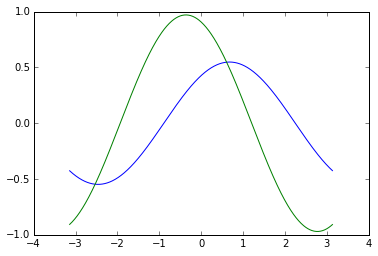

In [10]:
wt = np.arange(-np.pi,np.pi,0.01)
AK = 2/3.
BK = 0.42
phi = 2.18
eta = (AK-BK)*np.cos(wt) + 2*BK * np.cos(wt-phi/2.) * np.cos(phi/2.)
u = (AK-BK)*np.cos(wt) - 2*BK * np.sin(wt-phi/2.) * np.sin(phi/2.)
plt.plot(wt,eta)
plt.plot(wt,u)
print ((wt[np.argmax(u)])-(wt[np.argmax(eta)]))*180./np.pi
print ((u[np.argmax(u)])/(eta[np.argmax(eta)]))*g/c

(30, 629, 23) (30, 629, 23) (30,)
[ 0.     0.329]


<matplotlib.contour.QuadContourSet instance at 0x10d4f23f8>

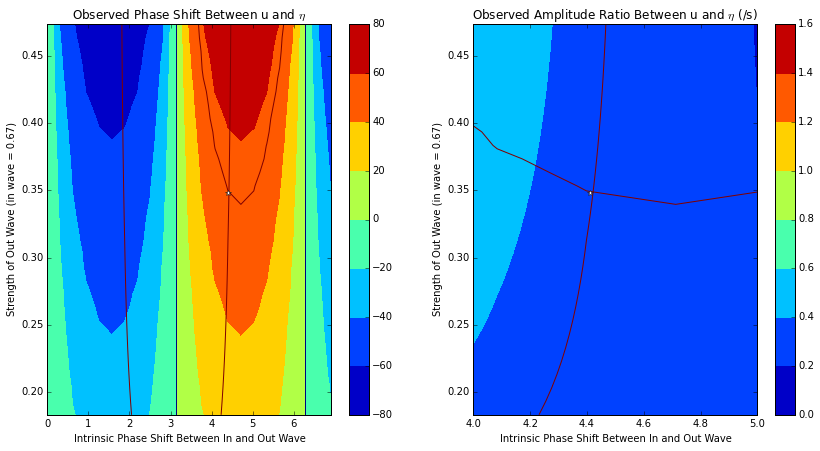

In [31]:
swt = np.arange(-np.pi,np.pi,0.01)
AK = 2/3.
sBK = 1/3.+np.arange(-0.15,0.15,0.01)
sphi = np.arange(0,2.3,0.1)*np.pi
wt, BK, phi = np.meshgrid(swt, sBK, sphi)
eta = (AK-BK)*np.cos(wt) + 2*BK * np.cos(wt-phi/2.) * np.cos(phi/2.)
u = (AK-BK)*np.cos(wt) - 2*BK * np.sin(wt-phi/2.) * np.sin(phi/2.)
#plt.plot(wt,eta)
#plt.plot(wt,u)
phase = np.zeros((u.shape[0],u.shape[2]))
amp = np.zeros_like(phase)
print u.shape, eta.shape, sBK.shape
for i, Bs in enumerate(sBK):
    for j, Ps in enumerate(sphi):
        phase[i,j] = ((wt[i,np.argmax(u[i,:,j]),j])-(wt[i,np.argmax(eta[i,:,j]),j]))*180./np.pi
        amp[i,j] = ((u[i,np.argmax(u[i,:,j]),j])/(eta[i,np.argmax(eta[i,:,j]),j]))*g/c
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.contourf(sphi,sBK,phase)
plt.colorbar()
levels1 = np.arange(0.,2*0.329,0.329)
plt.contour(sphi, sBK, amp, levels1)
plt.xlabel("Intrinsic Phase Shift Between In and Out Wave")
plt.ylabel("Strength of Out Wave (in wave = 0.67)")
plt.title("Observed Phase Shift Between u and $\eta$")
levels2 = np.arange(0.,2.*54,54.)
print levels1
plt.contour(sphi, sBK, phase, levels2)
plt.plot(4.41,0.348,'*w')
plt.subplot(1,2,2)
plt.contourf(sphi,sBK,amp)
plt.xlabel("Intrinsic Phase Shift Between In and Out Wave")
plt.ylabel("Strength of Out Wave (in wave = 0.67)")
plt.title("Observed Amplitude Ratio Between u and $\eta$ (/s)")
plt.xlim((4,5))
plt.colorbar()
plt.plot(4.41,0.348,'*w')
plt.contour(sphi, sBK, amp, levels1)
plt.contour(sphi, sBK, phase, levels2)


54.4309905374
0.331337914179


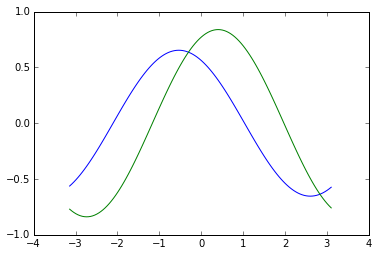

In [12]:
wt = np.arange(-np.pi,np.pi,0.05)
AK = 2/3.
BK = 0.348
phi = 4.41
eta = (AK-BK)*np.cos(wt) + 2*BK * np.cos(wt-phi/2.) * np.cos(phi/2.)
u = (AK-BK)*np.cos(wt) - 2*BK * np.sin(wt-phi/2.) * np.sin(phi/2.)
plt.plot(wt,eta)
plt.plot(wt,u)
print ((wt[np.argmax(u)])-(wt[np.argmax(eta)]))*180./np.pi
print ((u[np.argmax(u)])/(eta[np.argmax(eta)]))*g/c

In [13]:
omega = 2*np.pi/(12.4*3600.)  
cm = np.sqrt(g*60.)
k = omega/cm
print k
phi = 0.6*np.pi
print phi/k/2.

5.74619099535e-06
164017.833177


In [14]:
omega = 2*np.pi/(24.*3600.)  
cm = np.sqrt(g*60.)
k = omega/cm
print k
phi = 0.3*np.pi
print phi/k/2.

2.9688653476e-06
158726.935332


In [15]:
0.4/3.1415*180

22.91898774470794

In [16]:
54/360.*12.4

1.8599999999999999

In [17]:
90./360.*12.4

3.1

In [18]:
0.19/0.32

0.59375

In [19]:
0.26/0.37

0.7027027027027027